In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test)  = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:

X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


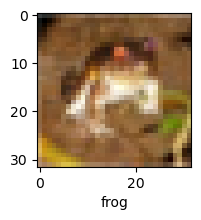

In [8]:
plot_sample(X_train,y_train,0)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train,y_train,epochs=5)

c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0992 - loss: 2.3780


[2.3779616355895996, 0.09920000284910202]

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.04      0.02      0.02      1000
           1       0.22      0.01      0.02      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.06      0.00      0.00      1000
           5       0.18      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.10      0.96      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.06      0.10      0.02     10000
weighted avg       0.06      0.10      0.02     10000



c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<Axes: >

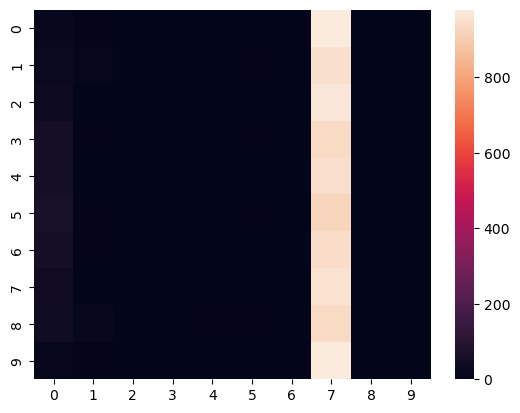

In [13]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

c:\Users\ADMIN\.conda\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.fit(    
    X_train,y_train,
    epochs = 20)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8155 - loss: 0.5161
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8277 - loss: 0.4872
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8319 - loss: 0.4704
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8397 - loss: 0.4512
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8440 - loss: 0.4366
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8532 - loss: 0.4138
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8569 - loss: 0.4021
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.3865
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8658 - loss: 0.3727
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8742 - loss: 0.3545
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8765 - loss: 0.3396
Epoch 12/20
1563/

In [24]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6622 - loss: 1.7793


[1.7792980670928955, 0.6621999740600586]

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

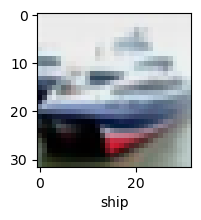

In [ ]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.75      0.80      0.78      1000
           2       0.54      0.54      0.54      1000
           3       0.50      0.41      0.45      1000
           4       0.59      0.63      0.61      1000
           5       0.53      0.58      0.56      1000
           6       0.74      0.77      0.75      1000
           7       0.73      0.70      0.71      1000
           8       0.76      0.76      0.76      1000
           9       0.74      0.77      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

